# XÂY DỰNG MÔ HÌNH HỒI QUY TUYẾN TÍNH
---
Project thực hiện dự đoán giá nhà dựa vào các thông số liên quan.
Tập dữ liệu để huấn luyện bao gồm 76 căn nhà tại thành phố Cracow - Ba lan
Các thuộc tính bao gồm:
1. Khoảng cách từ căn hộ tới trung tâm thành phố
2. Số phòng của căn hộ
3. Kích thước căn hộ
4. Giá căn hộ

![alt text](https://miro.medium.com/max/1400/1*eOrewomaMFP0E1fNyt8waw.png)

[link tham khảo](https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-1-initialization-and-prediction-7a84070b01c8)

dangvannam@FIT.HUMG

# 1. Đọc và quan sát tập dữ liệu
---

In [0]:
#Kết nối tới Drive lấy dữ liệu
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import pandas as pd
path_data = "/content/drive/My Drive/Colab Notebooks/10Project/Data7_LinearRegression_prices/Data_price_CracowCity.csv"
df_data = pd.read_csv(path_data)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   distance_to_city_center  76 non-null     float64
 1   rooms                    76 non-null     float64
 2   size                     76 non-null     float64
 3   price                    76 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


In [7]:
df_data.head()

,distance_to_city_center,rooms,size,price
0,2.4,1.0,19.35,191.565
1,2.4,2.0,13.08,221.568
2,5.0,1.0,24.66,185.936
3,1.9,1.0,24.82,275.502
4,1.9,1.0,25.39,241.205


In [20]:
df_data.describe()

,distance_to_city_center,rooms,size,price
count,76.000000,76.000000,76.000000,76.000000
mean,5.106579,2.644737,48.138684,356.867974
std,2.295639,1.261787,22.009502,157.198524
min,1.400000,1.000000,13.080000,151.757000
25%,3.000000,2.000000,30.600000,235.533750
50%,5.050000,2.500000,41.280000,298.442500
75%,6.800000,3.250000,58.162500,433.078500
max,11.300000,5.000000,106.960000,808.144000


**Trực quan hóa dữ liệu thể hiện mối tương quan giữa các thuộc tính KHOẢNG CÁCH, SỐ PHÒNG, KÍCH THƯỚC CĂN HỘ tới giá **

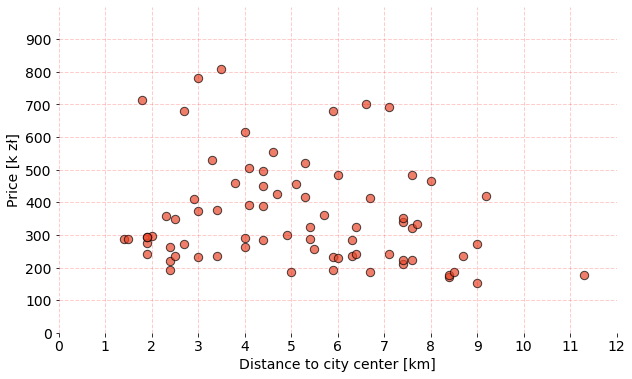

In [17]:
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({'font.size': 14})

f, axarr = plt.subplots(figsize=(10, 6))
axarr.scatter(df_data["distance_to_city_center"], df_data["price"],
                 edgecolor='black', linewidth='1', s=70, alpha=0.7, c="#e84629")
axarr.set_xlabel("Distance to city center [km]")
axarr.set_ylabel("Price [k zł]")
axarr.set_ylim(0, 1000)
axarr.set_yticks(np.arange(0, 1000, 100))
axarr.set_xticks(np.arange(0, 13, 1))
axarr.grid(color='red', linestyle='--', linewidth=1, alpha=0.2)
axarr.spines["top"].set_visible(False)
axarr.spines["right"].set_visible(False)
axarr.spines["bottom"].set_visible(False)
axarr.spines["left"].set_visible(False)

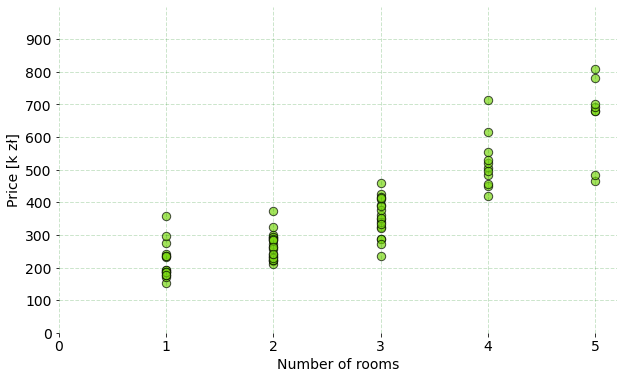

In [18]:
matplotlib.rcParams.update({'font.size': 14})
f, axarr = plt.subplots(figsize=(10, 6))

axarr.scatter(df_data["rooms"], df_data["price"],
                 edgecolor='black', linewidth='1', s=70, alpha=0.7, c="#7dd815")
axarr.set_xlabel("Number of rooms")
axarr.set_ylabel("Price [k zł]")
axarr.set_ylim(0, 1000)
axarr.set_yticks(np.arange(0, 1000, 100))
axarr.set_xticks(np.arange(0, 6, 1))
axarr.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)
axarr.spines["top"].set_visible(False)
axarr.spines["right"].set_visible(False)
axarr.spines["bottom"].set_visible(False)
axarr.spines["left"].set_visible(False)

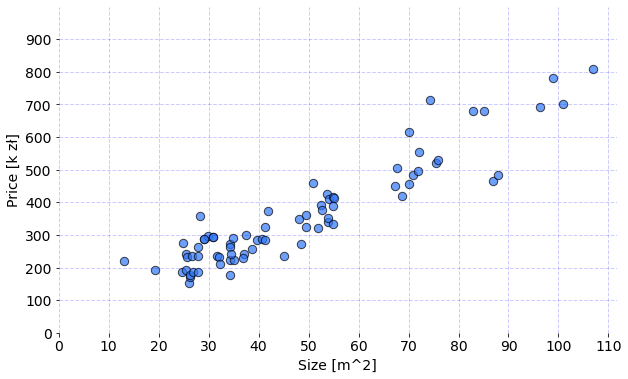

In [19]:
matplotlib.rcParams.update({'font.size': 14})
f, axarr = plt.subplots(figsize=(10, 6))
axarr.scatter(df_data["size"], df_data["price"],
                 edgecolor='black', linewidth='1', s=70, alpha=0.7, c="#3176f7")
axarr.set_xlabel("Size [m^2]")
axarr.set_ylabel("Price [k zł]")
axarr.set_ylim(0, 1000)
axarr.set_yticks(np.arange(0, 1000, 100));
axarr.set_xticks(np.arange(0, 120, 10));
axarr.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
axarr.spines["top"].set_visible(False)
axarr.spines["right"].set_visible(False)
axarr.spines["bottom"].set_visible(False)
axarr.spines["left"].set_visible(False);

## 2. Xây dựng mô hình linear Regression với 1 feature
---

In [0]:
#hàm khởi tạo trọng số và độ lệch
def init(n):
    return {"w": np.zeros(n), "b": 0.0}

In [0]:
#Hàm dự đoán
def predict(x, parameters):
    # Prediction initial value
    prediction = 0
    
    # Adding multiplication of each feature with it's weight
    for weight, feature in zip(parameters["w"], x):
        prediction += weight * feature
        
    # Adding bias
    prediction += parameters["b"]
        
    return prediction

In [29]:
#Tách thuộc tính đầu vào và thuộc tính đích
features=['size']
target =['price']

# Slice Dataframe to separate feature vectors and target value
X, y = df_data[features].to_numpy(), df_data[target].to_numpy()
print(type(X))

# Initialize model parameters
n = len(features)
model_parameters = init(n)

<class 'numpy.ndarray'>


In [0]:
predictions = [predict(x, model_parameters) for x in X]

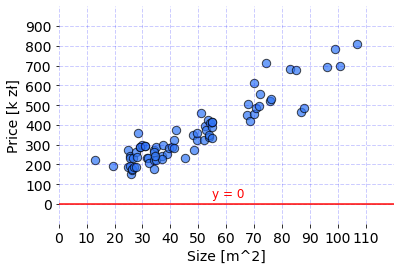

In [34]:
matplotlib.rcParams.update({'font.size': 14})

plt.scatter(df_data["size"], df_data["price"],
            edgecolor='black', linewidth='1', s=70, alpha=0.7, c="#3176f7")
plt.plot(np.arange(0, 120, 0.1), [predict([x], model_parameters) for x in np.arange(0, 120, 0.1)], c="red")
plt.text(55, 36, "y = 0", color="red", fontsize=12)
plt.xlabel("Size [m^2]")
plt.ylabel("Price [k zł]")
plt.ylim(-100, 1000)
plt.xlim(0, 120)
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(0, 120, 10))
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False);

Thay đổi các trọng số w và độ lệch bias

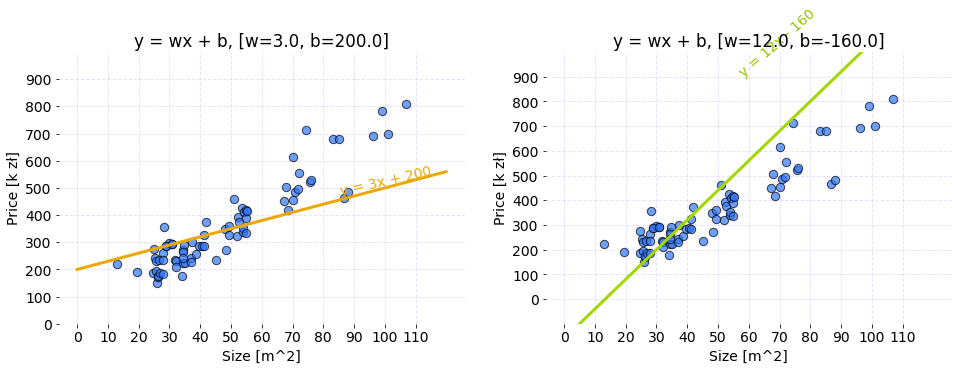

In [33]:
model_parameters_0 = {'b': 200, 'w': np.array([3.0])}
model_parameters_1 = {'b': -160, 'w': np.array([12.0])}

f, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].scatter(df_data["size"], df_data["price"],
                 edgecolor='black', linewidth="1", s=70, alpha=0.7, c="#3176f7")
axarr[0].plot(np.arange(0, 120, 0.1), [predict([x], model_parameters_0) for x in np.arange(0, 120, 0.1)], 
              c="#eaa800", linewidth="3")
axarr[0].text(85, 474, "y = 3x + 200", color="#eaa800", fontsize=14, rotation=13)
axarr[0].set_title("y = wx + b, [w=3.0, b=200.0]")
axarr[0].set_xlabel("Size [m^2]")
axarr[0].set_ylabel("Price [k zł]")
axarr[0].set_ylim(0, 1000)
axarr[0].set_yticks(np.arange(0, 1000, 100))
axarr[0].set_xticks(np.arange(0, 120, 10))
axarr[0].grid(color='blue', linestyle='--', linewidth=1, alpha=0.1)
axarr[0].spines["top"].set_visible(False)
axarr[0].spines["right"].set_visible(False)
axarr[0].spines["bottom"].set_visible(False)
axarr[0].spines["left"].set_visible(False)

axarr[1].scatter(df_data["size"], df_data["price"],
                 edgecolor='black', linewidth="1", s=70, alpha=0.7, c="#3176f7")
axarr[1].plot(np.arange(0, 120, 0.1), [predict([x], model_parameters_1) for x in np.arange(0, 120, 0.1)], 
              c="#a2d800", linewidth="3")
axarr[1].text(56, 900, "y = 12x - 160", color="#95c600", fontsize=14, rotation=41)
axarr[1].set_title("y = wx + b, [w=12.0, b=-160.0]")
axarr[1].set_xlabel("Size [m^2]")
axarr[1].set_ylabel("Price [k zł]")
axarr[1].set_ylim(-100, 1000)
axarr[1].set_yticks(np.arange(0, 1000, 100))
axarr[1].set_xticks(np.arange(0, 120, 10))
axarr[1].grid(color='blue', linestyle='--', linewidth=1, alpha=0.1)
axarr[1].spines["top"].set_visible(False)
axarr[1].spines["right"].set_visible(False)
axarr[1].spines["bottom"].set_visible(False)
axarr[1].spines["left"].set_visible(False)

In [0]:
#Hàm xác định lỗi
def mae(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing absolute differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += np.abs(prediction - target)
        
    # Calculating mean
    mae_error = (1.0 / samples_num) * accumulated_error
    
    return mae_error

In [0]:
def mse(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing square differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += (prediction - target)**2
        
    # Calculating mean and dividing by 2
    mse_error = (1.0 / (2*samples_num)) * accumulated_error
    
    return mse_error

In [0]:
# Parameter sets
orange_parameters = {'b': 200, 'w': np.array([3.0])}
lime_parameters = {'b': 6, 'w': np.array([6.0])}

# Make prediction for every data sample
orange_pred = [predict(x, orange_parameters) for x in X]
lime_pred = [predict(x, lime_parameters) for x in X]

# Model error
mse_orange_error = mse(orange_pred, y)
mse_lime_error = mse(lime_pred, y)

In [42]:
mse_orange_error

array([4909.18341201])

In [51]:
mse_lime_error

array([3696.82598372])

In [0]:
from copy import deepcopy

def train(X, y, model_parameters, step=0.1, iterations=100):    
    # Make prediction for every data sample
    predictions = [predict(x, model_parameters) for x in X]

    # Calculate cost for model - MSE
    lowest_error = mse(predictions, y)
    
    print("\nInitial state:")
    print(" - error: {}".format(lowest_error))
    print(" - parameters: {}".format(model_parameters))
 
    for i in range(iterations):
        candidates, errors = list(), list()

        # w increased, b increased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] += step
        param_candidate["w"] += step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w increased, b unchanged
        param_candidate = deepcopy(model_parameters)
        param_candidate["w"] += step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w increased, b decreased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] -= step
        param_candidate["w"][0] += step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w unchanged, b increased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] += step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w unchanged, b unchanged
        param_candidate = deepcopy(model_parameters)
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w unchanged, b decreased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] -= step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w decreased, b increased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] += step
        param_candidate["w"] -= step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w decreased, b unchanged
        param_candidate = deepcopy(model_parameters)
        param_candidate["w"] -= step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # w decreased, b decreased
        param_candidate = deepcopy(model_parameters)
        param_candidate["b"] -= step
        param_candidate["w"] -= step
        candidate_pred = [predict(x, param_candidate) for x in X]
        candidate_error = mse(candidate_pred, y)

        candidates.append(param_candidate)
        errors.append(candidate_error)

        # Update with parameters for which loss is smallest
        best_candidate = None
        for candidate, candidate_error in zip(candidates, errors):
            if candidate_error < lowest_error:
                lowest_error = candidate_error
                model_parameters["w"], model_parameters["b"] = candidate["w"], candidate["b"]
        
        # Display training progress every 20th iteration
        if i % 20 == 0:
            print("\nIteration {}:".format(i))
            print(" - error: {}".format(lowest_error))
            print(" - parameters: {}".format(model_parameters))
    
    print("\nFinal state:")
    print(" - error: {}".format(lowest_error))
    print(" - parameters: {}".format(model_parameters))

In [49]:
train(X, y, model_parameters)


Initial state:
 - error: [75870.4884482]
 - parameters: {'w': array([0.]), 'b': 0.0}

Iteration 0:
 - error: [73814.2609893]
 - parameters: {'w': array([0.1]), 'b': 0.1}

Iteration 20:
 - error: [38764.28631114]
 - parameters: {'w': array([2.1]), 'b': 2.1000000000000005}

Iteration 40:
 - error: [15284.92972772]
 - parameters: {'w': array([4.1]), 'b': 4.100000000000001}

Iteration 60:
 - error: [3376.19123904]
 - parameters: {'w': array([6.1]), 'b': 6.099999999999994}

Iteration 80:
 - error: [1753.32046443]
 - parameters: {'w': array([7.1]), 'b': 8.099999999999987}

Final state:
 - error: [1741.85716443]
 - parameters: {'w': array([7.1]), 'b': 9.99999999999998}
